In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

from pyts.image import GramianAngularField, MarkovTransitionField

In [3]:
DATASET_COLUMNS = ["time-interval", "counter-value", "event", "runtime", "percentage"]

In [215]:
def plot_ts_to_image(images, titles):
    rows = 1
    columns = 2
    fig = plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.title.set_text(titles[i])
        plt.imshow(image[0])
    
    plt.show()

In [218]:
def fit_transform_to_ts_to_image(ds_benign, ds_ransomware, transformer):
    start_index = 0

    for i in range(50, 200, 50):
        X_benign = np.array([ds_benign[start_index:i].values.flatten()])
        X_ransomware = np.array([ds_ransomware[start_index:i].values.flatten()])

        X_transformet_benign = transformer.fit_transform(X_benign)
        X_transformet_ransomware = transformer.fit_transform(X_ransomware)

        plot_ts_to_image(
            [X_transformet_benign, X_transformet_ransomware],
            ["Benign", "Ransomware"]
        )

        start_index += 50

## Time Series to Image (Branch Instructions)

In [159]:
dataset_benign_branch_instructions = pd.read_csv("data/benign-branch-instructions.csv", delimiter=",", header=None)
dataset_benign_branch_instructions = dataset_benign_branch_instructions.dropna(axis=1)
dataset_benign_branch_instructions.columns = DATASET_COLUMNS

print(dataset_benign_branch_instructions.shape)
dataset_benign_branch_instructions.head()

(411911, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010452,673597,branch-instructions,82102818,98.23
1,0.020993,416685,branch-instructions,67141031,80.03
2,0.031488,391423,branch-instructions,72762824,86.69
3,0.041902,552040,branch-instructions,67426486,80.52
4,0.052307,347851,branch-instructions,70607261,84.40


In [160]:
dataset_ransomware_branch_instructions = pd.read_csv("data/ransomware-branch-instructions.csv", delimiter=",", header=None)
dataset_ransomware_branch_instructions = dataset_ransomware_branch_instructions.dropna(axis=1)
dataset_ransomware_branch_instructions.columns = DATASET_COLUMNS

print(dataset_ransomware_branch_instructions.shape)
dataset_ransomware_branch_instructions.head()

(12423, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010327,354247,branch-instructions,38019191,46.33
1,0.020617,893405,branch-instructions,60558970,73.33
2,0.031023,690527,branch-instructions,46730346,56.46
3,0.041392,337800,branch-instructions,55677350,67.32
4,0.051646,267611,branch-instructions,51213177,62.10


In [163]:
dataset_benign_branch_instructions_observe = dataset_benign_branch_instructions[1000:].copy()
dataset_benign_branch_instructions_observe = dataset_benign_branch_instructions_observe.reset_index()
dataset_benign_branch_instructions_observe["interval"] = dataset_benign_branch_instructions_observe.index + 1

print(dataset_benign_branch_instructions_observe.shape)
dataset_benign_branch_instructions_observe.head()

(410911, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.307010,309933,branch-instructions,65909282,80.01,1
1,1001,10.317362,989338,branch-instructions,65917447,80.02,2
2,1002,10.327725,386434,branch-instructions,65911191,80.01,3
3,1003,10.338134,331708,branch-instructions,65913865,80.02,4
4,1004,10.348433,1249317,branch-instructions,65913008,80.02,5


In [164]:
dataset_ransomware_branch_instructions_observe = dataset_ransomware_branch_instructions[1000:].copy()
dataset_ransomware_branch_instructions_observe = dataset_ransomware_branch_instructions_observe.reset_index()
dataset_ransomware_branch_instructions_observe["interval"] = dataset_ransomware_branch_instructions_observe.index + 1

print(dataset_ransomware_branch_instructions_observe.shape)
dataset_ransomware_branch_instructions_observe.head()

(11423, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.239505,6237356,branch-instructions,54548836,66.66,1
1,1001,10.249762,6241939,branch-instructions,54542659,66.65,2
2,1002,10.259843,6748256,branch-instructions,54538284,66.65,3
3,1003,10.270070,6374967,branch-instructions,54561237,66.67,4
4,1004,10.280185,6334711,branch-instructions,54527929,66.63,5


### Prepare time series for converting to image

In [208]:
dataset_benign_branch_instructions_counter = dataset_benign_branch_instructions_observe[["counter-value"]].copy()
dataset_benign_branch_instructions_counter.head()

,counter-value
0,309933
1,989338
2,386434
3,331708
4,1249317


In [211]:
dataset_ransomware_branch_instructions_counter = dataset_ransomware_branch_instructions_observe[["counter-value"]].copy()
dataset_ransomware_branch_instructions_counter.head()

,counter-value
0,6237356
1,6241939
2,6748256
3,6374967
4,6334711


### Gramian angular simulation

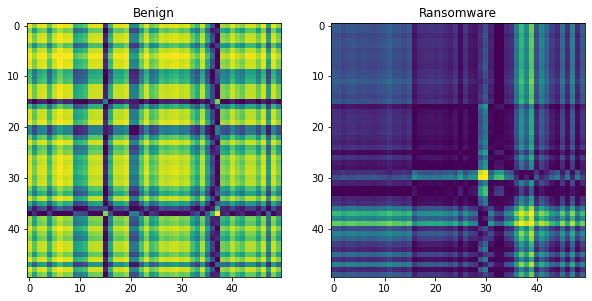

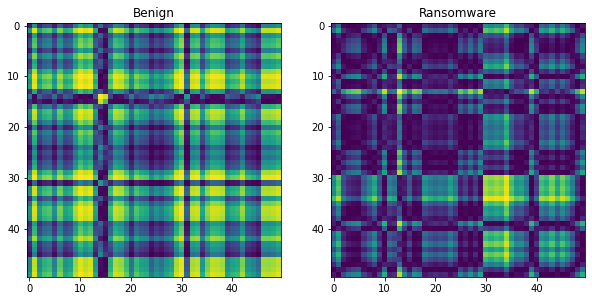

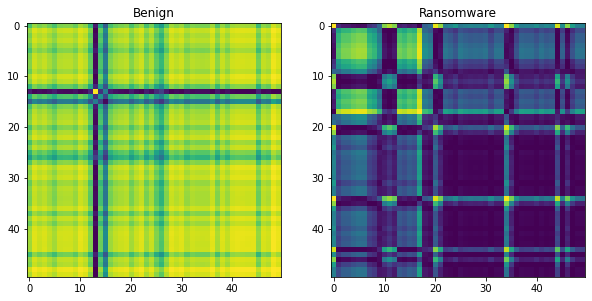

In [219]:
gaf = GramianAngularField()

fit_transform_to_ts_to_image(
    dataset_benign_branch_instructions_counter,
    dataset_ransomware_branch_instructions_counter,
    gaf
)

### Markow transition

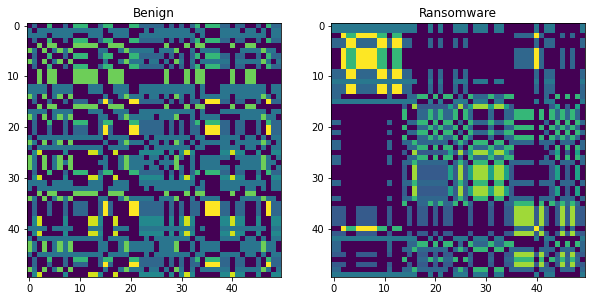

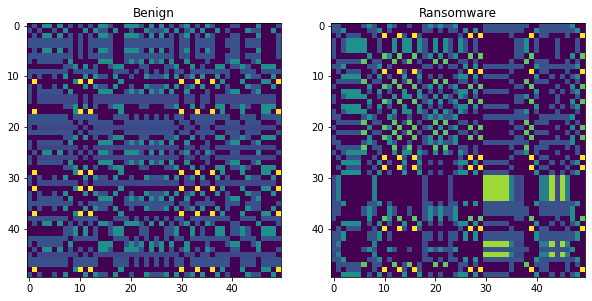

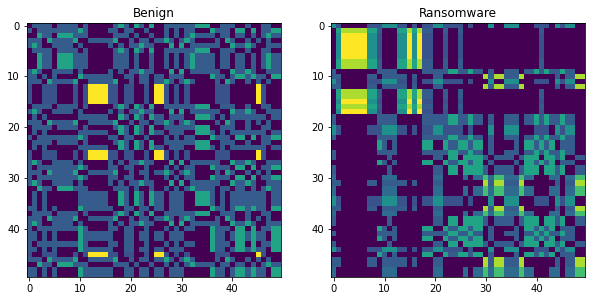

In [220]:
mtf = MarkovTransitionField()

fit_transform_to_ts_to_image(
    dataset_benign_branch_instructions_counter,
    dataset_ransomware_branch_instructions_counter,
    mtf
)

## Time Series to Image (Branch misses)

In [221]:
dataset_benign_branch_misses = pd.read_csv("data/benign-branch-misses.csv", delimiter=",", header=None)
dataset_benign_branch_misses = dataset_benign_branch_misses.dropna(axis=1)
dataset_benign_branch_misses.columns = DATASET_COLUMNS

print(dataset_benign_branch_misses.shape)
dataset_benign_branch_misses.head()

(140071, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010307,40064,branch-misses,82754108,100.0
1,0.020883,62749,branch-misses,83390652,100.0
2,0.031241,29833,branch-misses,83423136,100.0
3,0.041737,23706,branch-misses,83517332,100.0
4,0.052197,28022,branch-misses,83554011,100.0


In [222]:
dataset_ransomware_branch_misses = pd.read_csv("data/ransomware-branch-misses.csv", delimiter=",", header=None)
dataset_ransomware_branch_misses = dataset_ransomware_branch_misses.dropna(axis=1)
dataset_ransomware_branch_misses.columns = DATASET_COLUMNS

print(dataset_ransomware_branch_misses.shape)
dataset_ransomware_branch_misses.head()

(72618, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010463,68342,branch-misses,83316266,100.0
1,0.020988,36803,branch-misses,83332323,100.0
2,0.031287,37600,branch-misses,83347190,100.0
3,0.041817,35701,branch-misses,83586395,100.0
4,0.052347,31191,branch-misses,83646861,100.0


In [225]:
dataset_benign_branch_misses_observe = dataset_benign_branch_misses[1000:].copy()
dataset_benign_branch_misses_observe = dataset_benign_branch_misses_observe.reset_index()
dataset_benign_branch_misses_observe["interval"] = dataset_benign_branch_misses_observe.index + 1

print(dataset_benign_branch_misses_observe.shape)
dataset_benign_branch_misses_observe.head()

(139071, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.338043,32529,branch-misses,82622732,100.0,1
1,1001,10.348437,70926,branch-misses,82622382,100.0,2
2,1002,10.358728,54371,branch-misses,82622490,100.0,3
3,1003,10.369118,93321,branch-misses,82622906,100.0,4
4,1004,10.379458,38780,branch-misses,82623125,100.0,5


In [226]:
dataset_ransomware_branch_misses_observe = dataset_ransomware_branch_misses[1000:].copy()
dataset_ransomware_branch_misses_observe = dataset_ransomware_branch_misses_observe.reset_index()
dataset_ransomware_branch_misses_observe["interval"] = dataset_ransomware_branch_misses_observe.index + 1

print(dataset_ransomware_branch_misses_observe.shape)
dataset_ransomware_branch_misses_observe.head()

(71618, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.276669,32897,branch-misses,82130359,100.0,1
1,1001,10.286919,66471,branch-misses,82130269,100.0,2
2,1002,10.297208,41498,branch-misses,82130365,100.0,3
3,1003,10.307488,35409,branch-misses,82130471,100.0,4
4,1004,10.317688,85934,branch-misses,82129885,100.0,5


### Prepare time series for converting to image

In [227]:
dataset_benign_branch_misses_counter = dataset_benign_branch_misses_observe[["counter-value"]].copy()
dataset_benign_branch_misses_counter.head()

,counter-value
0,32529
1,70926
2,54371
3,93321
4,38780


In [228]:
dataset_ransomware_branch_misses_counter = dataset_ransomware_branch_misses_observe[["counter-value"]].copy()
dataset_ransomware_branch_misses_counter.head()

,counter-value
0,32897
1,66471
2,41498
3,35409
4,85934


### Gramian angular simulation

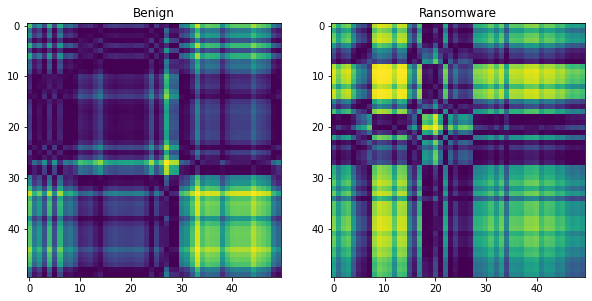

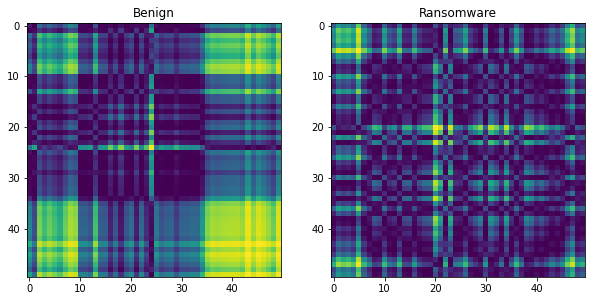

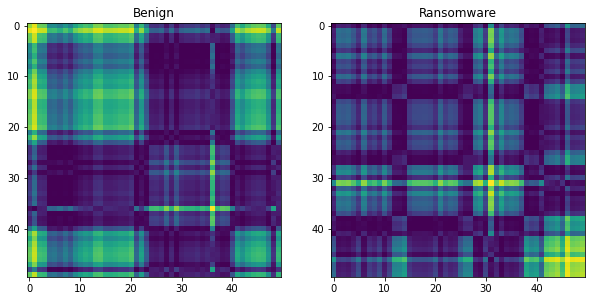

In [229]:
gaf = GramianAngularField()

fit_transform_to_ts_to_image(
    dataset_benign_branch_misses_counter,
    dataset_ransomware_branch_misses_counter,
    gaf
)

### Markov transition

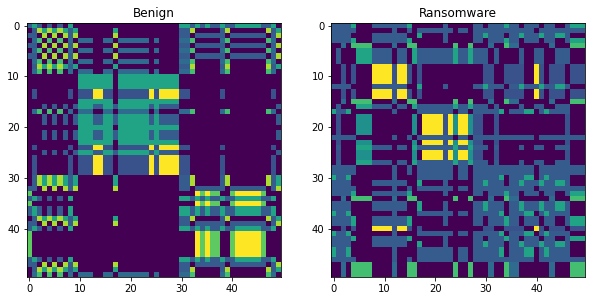

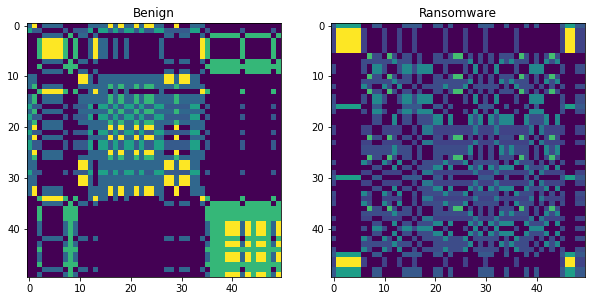

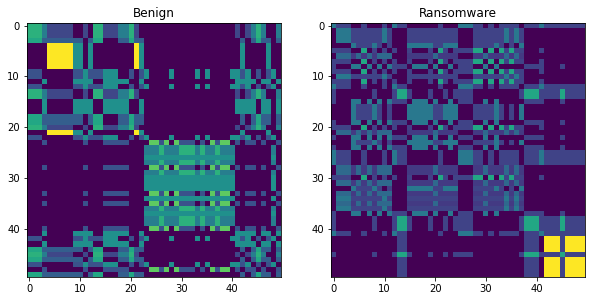

In [230]:
mtf = MarkovTransitionField()

fit_transform_to_ts_to_image(
    dataset_benign_branch_misses_counter,
    dataset_ransomware_branch_misses_counter,
    mtf
)

## Time Series to Image (Cache misses)

In [232]:
dataset_benign_cache_misses = pd.read_csv("data/benign-cache-misses.csv", delimiter=",", header=None)
dataset_benign_cache_misses = dataset_benign_cache_misses.dropna(axis=1)
dataset_benign_cache_misses.columns = DATASET_COLUMNS

print(dataset_benign_cache_misses.shape)
dataset_benign_cache_misses.head()

(120359, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010333,136189,cache-misses,82313231,100.0
1,0.020657,71252,cache-misses,82796052,100.0
2,0.031124,38999,cache-misses,83156551,100.0
3,0.041641,31951,cache-misses,83395379,100.0
4,0.052164,32910,cache-misses,83512125,100.0


In [233]:
dataset_ransomware_cache_misses = pd.read_csv("data/ransomware-cache-misses.csv", delimiter=",", header=None)
dataset_ransomware_cache_misses = dataset_ransomware_cache_misses.dropna(axis=1)
dataset_ransomware_cache_misses.columns = DATASET_COLUMNS

print(dataset_ransomware_cache_misses.shape)
dataset_ransomware_cache_misses.head()

(44676, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010334,258926,cache-misses,78539620,95.72
1,0.020581,304258,cache-misses,64397756,78.31
2,0.030903,132187,cache-misses,70390931,85.55
3,0.041167,183076,cache-misses,65308991,79.41
4,0.051457,44670,cache-misses,68692226,83.53


In [234]:
dataset_benign_cache_misses_observe = dataset_benign_cache_misses[1000:].copy()
dataset_benign_cache_misses_observe = dataset_benign_cache_misses_observe.reset_index()
dataset_benign_cache_misses_observe["interval"] = dataset_benign_cache_misses_observe.index + 1

print(dataset_benign_cache_misses_observe.shape)
dataset_benign_cache_misses_observe.head()

(119359, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.358607,2539,cache-misses,82786187,100.0,1
1,1001,10.368964,165046,cache-misses,82786326,100.0,2
2,1002,10.379368,158962,cache-misses,82786985,100.0,3
3,1003,10.389783,80097,cache-misses,82787268,100.0,4
4,1004,10.400146,10315,cache-misses,82787520,100.0,5


In [235]:
dataset_ransomware_cache_misses_observe = dataset_ransomware_cache_misses[1000:].copy()
dataset_ransomware_cache_misses_observe = dataset_ransomware_cache_misses_observe.reset_index()
dataset_ransomware_cache_misses_observe["interval"] = dataset_ransomware_cache_misses_observe.index + 1

print(dataset_ransomware_cache_misses_observe.shape)
dataset_ransomware_cache_misses_observe.head()

(43676, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.218839,112821,cache-misses,65351443,80.02,1
1,1001,10.228977,14960,cache-misses,65353797,80.02,2
2,1002,10.239158,153381,cache-misses,65348745,80.02,3
3,1003,10.249296,116542,cache-misses,65353646,80.02,4
4,1004,10.259487,124026,cache-misses,65346060,80.02,5


### Prepare time series for converting to image

In [236]:
dataset_benign_cache_misses_counter = dataset_benign_cache_misses_observe[["counter-value"]].copy()
dataset_benign_cache_misses_counter.head()

,counter-value
0,2539
1,165046
2,158962
3,80097
4,10315


In [237]:
dataset_ransomware_cache_misses_counter = dataset_ransomware_cache_misses_observe[["counter-value"]].copy()
dataset_ransomware_cache_misses_counter.head()

,counter-value
0,112821
1,14960
2,153381
3,116542
4,124026


### Gramian angular simulation

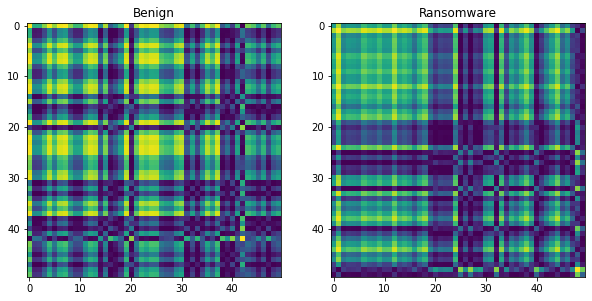

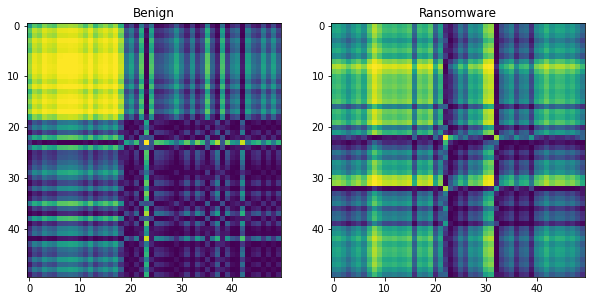

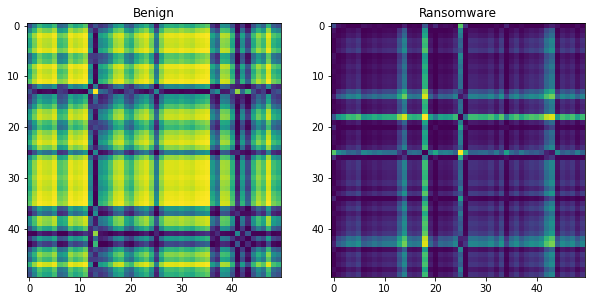

In [238]:
gaf = GramianAngularField()

fit_transform_to_ts_to_image(
    dataset_benign_cache_misses_counter,
    dataset_ransomware_cache_misses_counter,
    gaf
)

### Markov transition

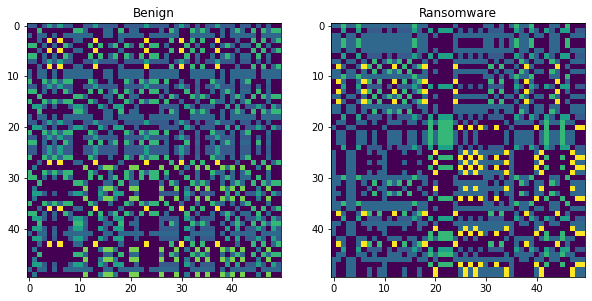

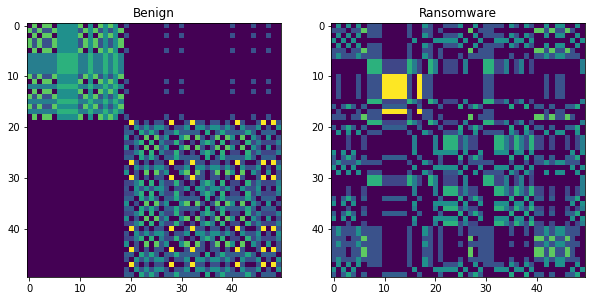

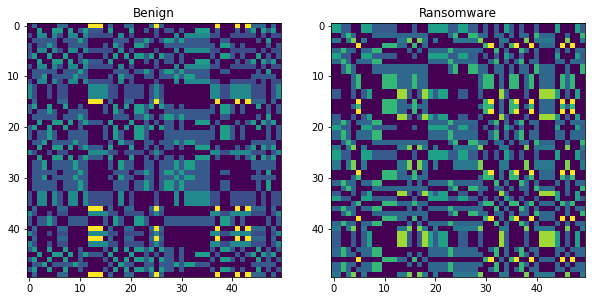

In [239]:
mtf = MarkovTransitionField()

fit_transform_to_ts_to_image(
    dataset_benign_cache_misses_counter,
    dataset_ransomware_cache_misses_counter,
    mtf
)

## Time Series to Image (Cache References)

In [240]:
dataset_benign_cache_references = pd.read_csv("data/benign-cache-references.csv", delimiter=",", header=None)
dataset_benign_cache_references = dataset_benign_cache_references.dropna(axis=1)
dataset_benign_cache_references.columns = DATASET_COLUMNS

print(dataset_benign_cache_references.shape)
dataset_benign_cache_references.head()

(106679, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010243,830525,cache-references,81954793,100.0
1,0.020617,714546,cache-references,82348731,100.0
2,0.030905,827680,cache-references,82431082,100.0
3,0.041283,505713,cache-references,82612535,100.0
4,0.051697,541460,cache-references,82732483,100.0


In [241]:
dataset_ransomware_cache_references = pd.read_csv("data/ransomware-cache-references.csv", delimiter=",", header=None)
dataset_ransomware_cache_references = dataset_ransomware_cache_references.dropna(axis=1)
dataset_ransomware_cache_references.columns = DATASET_COLUMNS

print(dataset_ransomware_cache_references.shape)
dataset_ransomware_cache_references.head()

(9576, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010208,1955597,cache-references,35824231,43.72
1,0.020454,1502355,cache-references,58847273,71.85
2,0.030715,1033919,cache-references,45143499,55.10
3,0.040948,1380785,cache-references,54359529,66.33
4,0.051210,1605479,cache-references,51095808,62.43


In [242]:
dataset_benign_cache_references_observe = dataset_benign_cache_references[1000:].copy()
dataset_benign_cache_references_observe = dataset_benign_cache_references_observe.reset_index()
dataset_benign_cache_references_observe["interval"] = dataset_benign_cache_references_observe.index + 1

print(dataset_benign_cache_references_observe.shape)
dataset_benign_cache_references_observe.head()

(105679, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.289851,408742,cache-references,82236247,100.0,1
1,1001,10.300243,508010,cache-references,82237579,100.0,2
2,1002,10.310637,489995,cache-references,82238358,100.0,3
3,1003,10.321009,373691,cache-references,82238752,100.0,4
4,1004,10.331355,351823,cache-references,82239757,100.0,5


In [243]:
dataset_ransomware_cache_references_observe = dataset_ransomware_cache_references[1000:].copy()
dataset_ransomware_cache_references_observe = dataset_ransomware_cache_references_observe.reset_index()
dataset_ransomware_cache_references_observe["interval"] = dataset_ransomware_cache_references_observe.index + 1

print(dataset_ransomware_cache_references_observe.shape)
dataset_ransomware_cache_references_observe.head()

(8576, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.216175,1071641,cache-references,54428235,66.66,1
1,1001,10.226458,2157606,cache-references,54418349,66.65,2
2,1002,10.236566,2257235,cache-references,54418291,66.65,3
3,1003,10.246780,1861543,cache-references,54437223,66.67,4
4,1004,10.256888,2059187,cache-references,54408151,66.64,5


### Prepare time series for converting to image

In [244]:
dataset_benign_cache_references_counter = dataset_benign_cache_references_observe[["counter-value"]].copy()
dataset_benign_cache_references_counter.head()

,counter-value
0,408742
1,508010
2,489995
3,373691
4,351823


In [245]:
dataset_ransomware_cache_references_counter = dataset_ransomware_cache_references_observe[["counter-value"]].copy()
dataset_ransomware_cache_references_counter.head()

,counter-value
0,1071641
1,2157606
2,2257235
3,1861543
4,2059187


### Gramian angular simulation

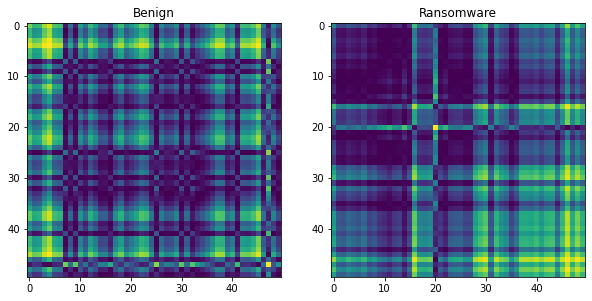

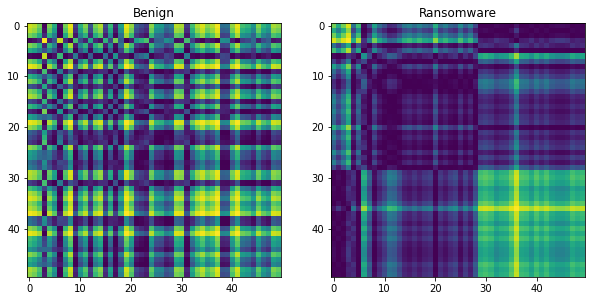

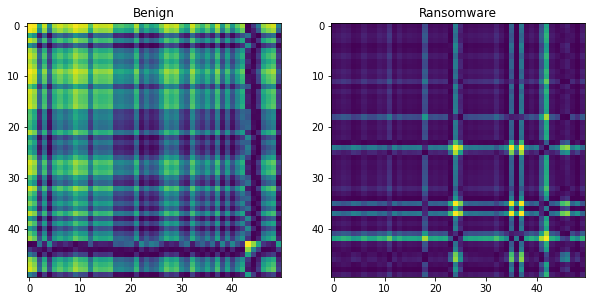

In [246]:
gaf = GramianAngularField()

fit_transform_to_ts_to_image(
    dataset_benign_cache_references_counter,
    dataset_ransomware_cache_references_counter,
    gaf
)

### Markov transition

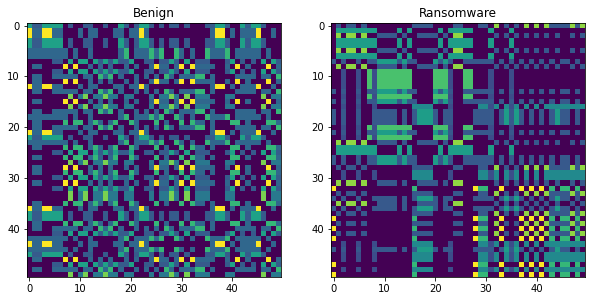

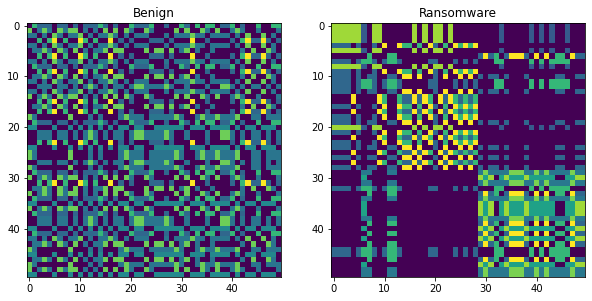

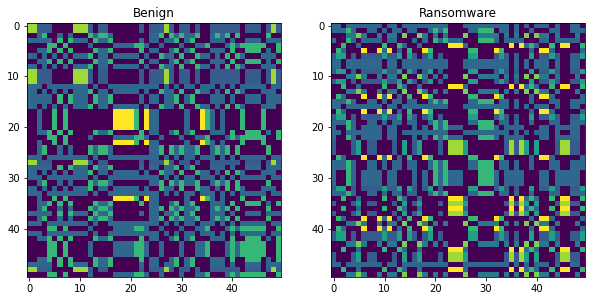

In [247]:
mtf = MarkovTransitionField()

fit_transform_to_ts_to_image(
    dataset_benign_cache_references_counter,
    dataset_ransomware_cache_references_counter,
    mtf
)